In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install networkx

In [2]:
# Importando algunas librerías que utilizaremos

# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd

# Mostrar imágenes
from IPython.display import HTML

# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
iata_spain = pd.read_csv('C:/Users/renea/Desktop/Grafos/iata_spain.csv')
iata_spain.head()

,code,location,name
0,ALC,Alicante,Aeropuerto de Alicante-Elche
1,LEI,Almería,Aeropuerto de Almería
2,BJZ,Badajoz,Aeropuerto de Badajoz
3,BCN,El Prat de Llobregat (Barcelona),Aeropuerto de Barcelona-El Prat
4,BIO,Sondica (Bilbao),Aeropuerto de Bilbao


In [4]:
iata_spain.set_index(["code"], inplace=True) # Establece la columna code como indice, siendo este code el codigo del aeropuerto
iata_spain.head()

,location,name
code,,
ALC,Alicante,Aeropuerto de Alicante-Elche
LEI,Almería,Aeropuerto de Almería
BJZ,Badajoz,Aeropuerto de Badajoz
BCN,El Prat de Llobregat (Barcelona),Aeropuerto de Barcelona-El Prat
BIO,Sondica (Bilbao),Aeropuerto de Bilbao


In [5]:
iata_spain.loc["ALC"] # de esta manera si yo solo quisiera los datos del aeropuerto de alicante, de esta manera me da toda la data

location                        Alicante
name        Aeropuerto de Alicante-Elche
Name: ALC, dtype: object

In [6]:
spain_flights = pd.read_csv("C:/Users/renea/Desktop/Grafos/sample_spain_flights.csv") # data frame de vuelos con origen, destinos, precios y duracion
spain_flights.head()

,origin,destination,duration,price
0,ALC,OVD,100.0,370
1,VGO,VLC,85.0,196
2,TFN,VGO,150.0,613
3,SVQ,MAH,95.0,728
4,MAD,VGO,70.0,57


In [7]:
spain_flights = pd.read_csv("C:/Users/renea/Desktop/Grafos/sample_spain_flights.csv") # data frame de vuelos con origen, destinos, precios y duracion
spain_flights.head()

,origin,destination,duration,price
0,ALC,OVD,100.0,370
1,VGO,VLC,85.0,196
2,TFN,VGO,150.0,613
3,SVQ,MAH,95.0,728
4,MAD,VGO,70.0,57


In [8]:
spain_flights.describe()

,duration,price
count,183.000000,183.000000
mean,106.092896,295.967213
std,48.825852,257.873295
min,30.000000,6.000000
25%,70.000000,109.500000
50%,90.000000,225.000000
75%,150.000000,363.000000
max,220.000000,1326.000000


In [9]:
DG=nx.DiGraph() # Vamos a generar un grafo con todas las posibles combinaciones
for row in spain_flights.iterrows(): # Para cada uno de los  rows del data frame, añadimos una edge al grafo que va a tener ...
    DG.add_edge(row[1]["origin"], # ... el origen
                row[1]["destination"],# ...el destino
                duration=row[1]["duration"], # ....la duracion
                price=row[1]["price"]) # ...y el precio

In [10]:
DG.nodes(data=True) # para poder ver los nodos que se han generado, sin embargo para verlo de manera grafica, a continuacion

NodeDataView({'ALC': {}, 'OVD': {}, 'VGO': {}, 'VLC': {}, 'TFN': {}, 'SVQ': {}, 'MAH': {}, 'MAD': {}, 'TFS': {}, 'AGP': {}, 'ZAZ': {}, 'BCN': {}, 'BIO': {}, 'GRX': {}, 'LPA': {}, 'IBZ': {}, 'LEN': {}, 'SDR': {}, 'ACE': {}, 'EAS': {}, 'LEI': {}, 'PNA': {}, 'VLL': {}, 'BJZ': {}, 'VDE': {}, 'VIT': {}})

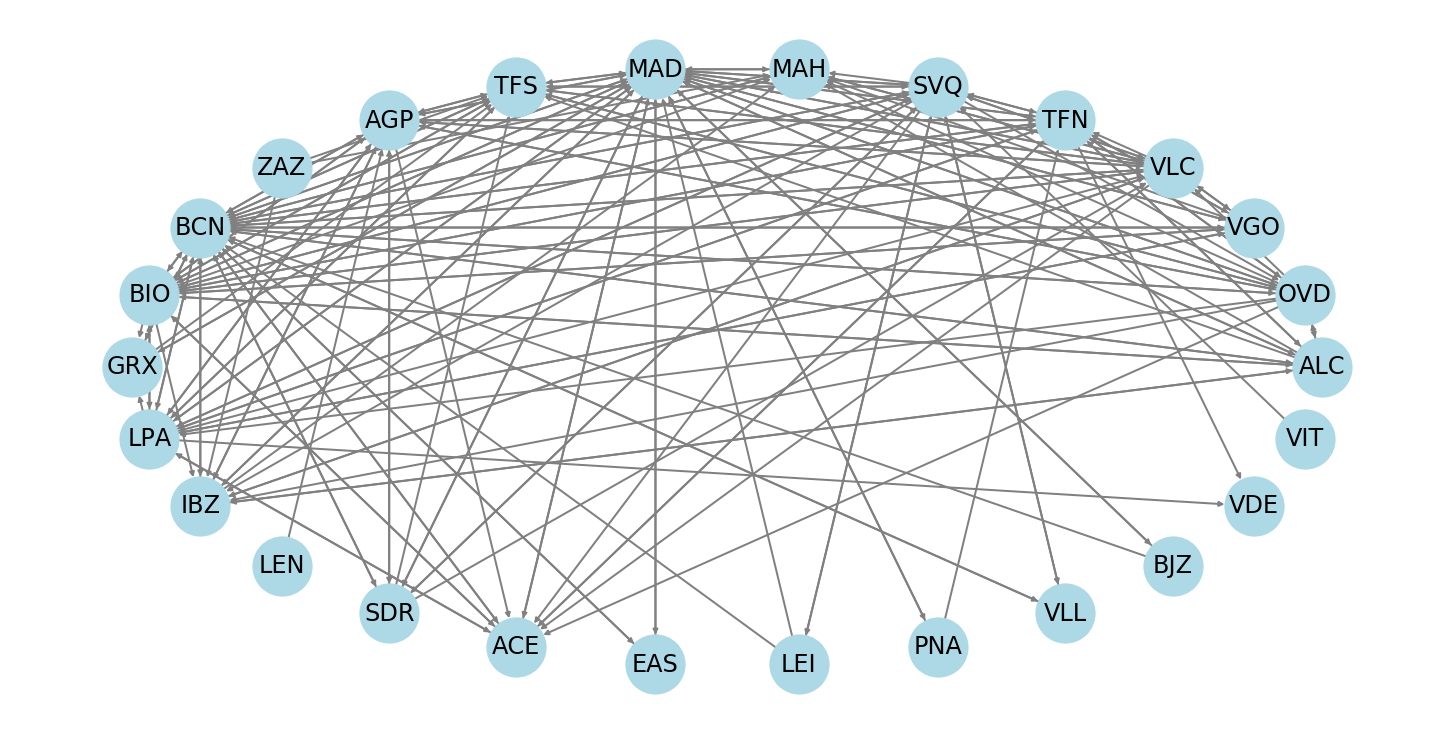

In [11]:
nx.draw_circular(DG,                                            # genera un grafo circular
                 node_color="lightblue",                        # nodos azules
                 edge_color="gray",                             # las lineas en gris 
                 font_size=24,                                  # tamaño de la fuente
                 width=2, with_labels=True, node_size=3500,     # controla el tamaño del circulo que dibuja el nodo
)

In [12]:
list(nx.all_shortest_paths(DG, source = "PNA", target = "VLL", weight = None)) # ahora para saber los caminos cortos 
 # posibles desde panplona PNA  a Valla Dolid VLL, los caminos con menos escalas y me da los grafos

[['PNA', 'TFN', 'BCN', 'VLL'],
 ['PNA', 'MAD', 'BCN', 'VLL'],
 ['PNA', 'TFN', 'SVQ', 'VLL'],
 ['PNA', 'MAD', 'SVQ', 'VLL']]

In [13]:
list(nx.dijkstra_path(DG, source = "PNA", target = "VLL", weight = None)) # Podemos pedirle a nuestro sistema que
# nos encuentre el camino mas corto desde PNA a VLL utilizando Djistra que arrojará el camino con menos número de escalas

['PNA', 'TFN', 'BCN', 'VLL']

In [14]:
list(nx.dijkstra_path(DG, source = "PNA", target = "VLL", weight = "duration"))

['PNA', 'MAD', 'SVQ', 'VLL']

In [15]:
list(nx.dijkstra_path(DG, source = "PNA", target = "VLL", weight = "price")) # En este caso nos dara el camino más barato

['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']

In [16]:
list(nx.astar_path(DG, ("PNA"), ("VLL"), weight = "price")) # En este caso nos dara el camino más barato

['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']

In [17]:
list(nx.astar_path(DG, ("PNA"), ("VLL"), weight = "duration")) # En este caso nos dara el camino que dura menos

['PNA', 'MAD', 'SVQ', 'VLL']

In [18]:
list(nx.astar_path(DG, ("PNA"), ("VLL"), weight = None)) # En este caso nos da el caso con menor numero de saltos

['PNA', 'TFN', 'BCN', 'VLL']

In [19]:
# Una function que nos muestre el caminp
def show_path(path):
    total_price = 0
    total_duration = 0
    
    for i in range(len(path)-1):
        origin = path[i]
        destination = path[i+1]
        duration = DG[origin][destination]["duration"]
        price = DG[origin][destination]["price"]
        
        total_price = total_price+price
        total_duration = total_duration+duration
        print("    %s -> %s\n    - Duration: %s Price: %s €" %  (
            iata_spain.loc[origin]["name"],
            iata_spain.loc[destination]["name"],
            duration, price)
        ) # origen destino duracion y price
        
    print("\n     Total Duration: %s Total price: %s €\n" %  (
            total_duration, total_price)
    )

In [20]:
# Una funcion que muestre todos los caminos mas cortos de un grafico dirigido desde un origen hasta un destino

def get_all_shortest_paths(DiGraph, origin, destination):
    print("*** All shortest paths - Origen: %s Destino: %s" % (
        origin, destination
    ))
    for weight in [None, "duration", "price"]:
        print("* Ordenando por: %s" % weight)
        paths = list(nx.all_shortest_paths( DiGraph,
                                           source = origin,
                                           target = destination,
                                           weight = weight))
        for path in paths:
            print("  Camino óptimo: %s" % path)
            show_path(path)

In [21]:
get_all_shortest_paths(DG, origin = "PNA", destination = "VLL")

*** All shortest paths - Origen: PNA Destino: VLL
* Ordenando por: None
  Camino óptimo: ['PNA', 'TFN', 'BCN', 'VLL']
    Aeropuerto de Pamplona -> Aeropuerto de Tenerife Norte
    - Duration: 185.0 Price: 1226 €
    Aeropuerto de Tenerife Norte -> Aeropuerto de Barcelona-El Prat
    - Duration: 205.0 Price: 185 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    - Duration: 90.0 Price: 94 €

     Total Duration: 480.0 Total price: 1505 €

  Camino óptimo: ['PNA', 'MAD', 'BCN', 'VLL']
    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Barcelona-El Prat
    - Duration: 80.0 Price: 94 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    - Duration: 90.0 Price: 94 €

     Total Duration: 230.0 Total price: 514 €

  Camino óptimo: ['PNA', 'TFN', 'SVQ', 'VLL']
    Aeropuerto de Pamplona -> Aeropuerto de Tenerife Norte
    - Duration: 185.0 Pric

In [23]:
# En el resultado de arriba hemos obtenido todos los resultados, sin embargo si queremos solo el mas corto en precio o en saltos....

def get_shortest_path(DiGraph, origin, destination):
    print("*** Origen: %s Destino: %s " % (origin, destination))
    
    for weight in [None, "duration", "price"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                 (origin),
                                 (destination),
                                 weight = weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)

In [25]:
# vamos a plotear las rutas

def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos = positions,
                node_color='lightblue',
                edge_color = 'gray',
                font_size = 24,
                widht=1, with_labels = True, node_size = 3500, alpha = 0.8
           )
    
    short_path=nx.DiGraph() # esto me da todos los caminos
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
        
    nx.draw(short_path, pos=positions,
                  node_color = 'dodgerblue',
                  edge_color = 'dodgerblue',
                  font_size = 24,
                  width=3, with_labels=True, node_size = 3000
           )
    plt.show()
        

['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']


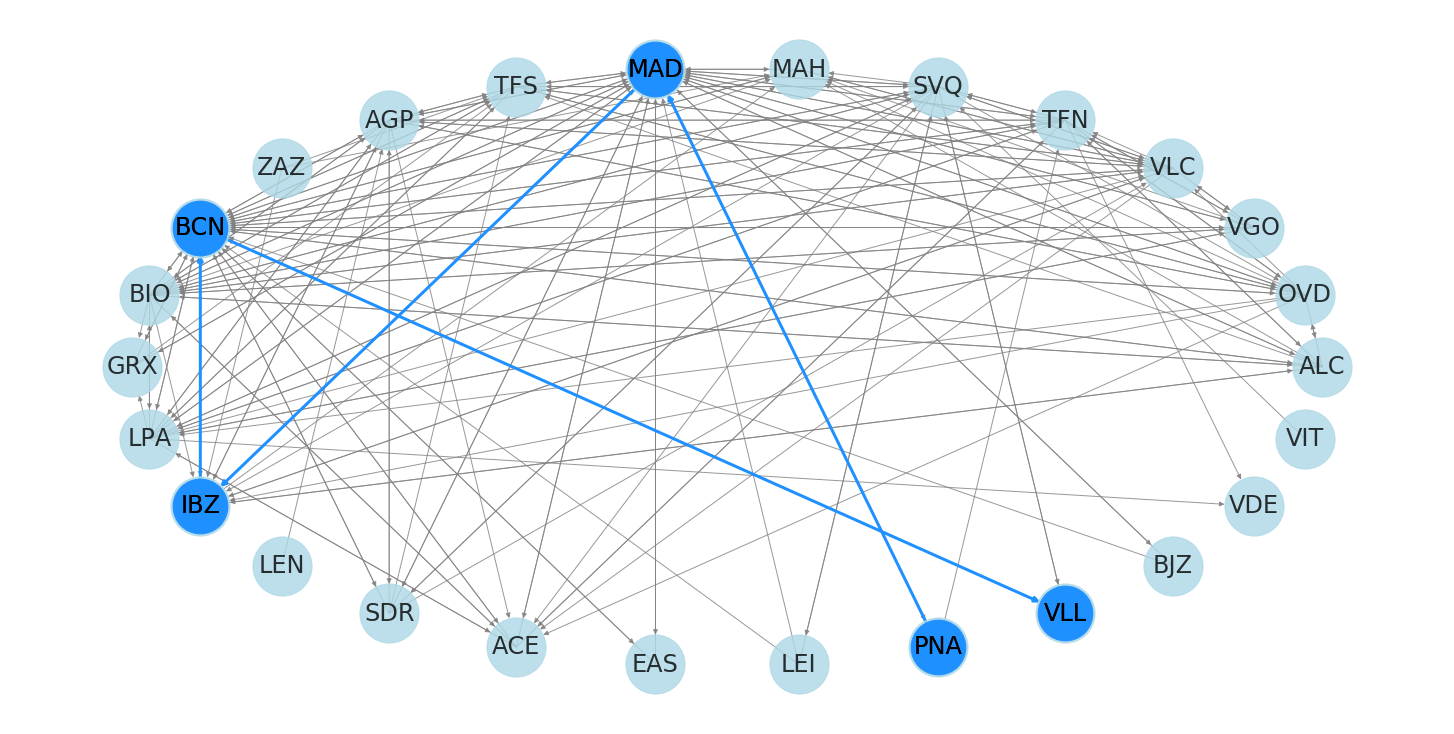

In [26]:
path = ['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']
plot_shortest_path(path)